# Libraries Loading

In [1]:
import utils.dataHandlingUtils as dU

In [2]:
import os
import torchaudio
import torch
from IPython.display import Audio
from torch.utils.data import DataLoader

# Data Preprocessing

## Data Loading

In [3]:
if not os.path.exists('MiniLibriMix.zip'):
    !wget https://zenodo.org/record/3868490/files/MiniLibriMix.zip?download=1 -O MiniLibriMix.zip
if not os.path.exists('MiniLibriMix'):
    !unzip MiniLibriMix


In [4]:
file = 'MiniLibriMix/train/mix_both/ovl_0.wav'

In [5]:
waveform, sample_rate = dU.load(file)
print(waveform.shape)
print(sample_rate)
Audio(waveform, rate=sample_rate)

torch.Size([1, 128000])
16000


## Adjust the sample and write it back

### Adjust sample rate of a file

In [6]:
waveform, sample_rate = dU.load(file)
print(waveform.shape)
print(sample_rate)
dU.reshape_SampleRate_write(file, 16000)

torch.Size([1, 128000])
16000


### Load the data 

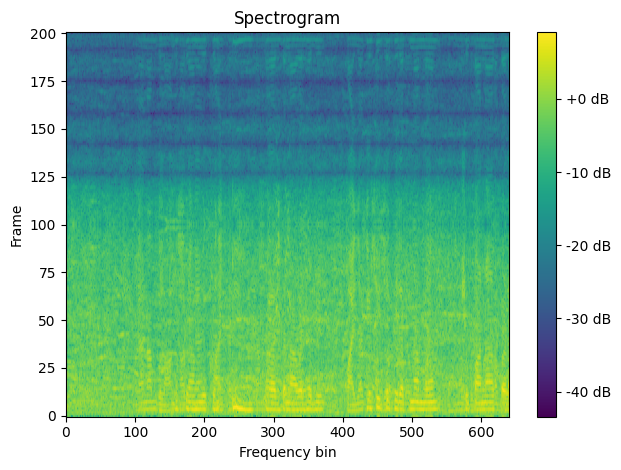

In [7]:
dU.plot_spectrogram(file)
dU.play_audio(file)

### Adjust sample rate of a folder

In [8]:
folder_path_clean = 'MiniLibriMix/train/mix_clean'
folder_path_mix = 'MiniLibriMix/train/mix_both'

In [9]:
if dU.check_sample_rate_consistency(folder_path_clean)[0]== True and dU.check_sample_rate_consistency(folder_path_clean)[1]== 16000:
    dU.reshape_SampleRate_write_folder(16000, folder_path_clean)
    print('All files in the folder have been converted to 16kHz')
else:
    print('Not all files in the folder have the same sample rate and have not been converted')
if dU.check_sample_rate_consistency(folder_path_mix)[0]== True and dU.check_sample_rate_consistency(folder_path_mix)[1]== 16000:
    dU.reshape_SampleRate_write_folder(16000, folder_path_mix)
    print('All files in the folder have been converted to 16kHz')
else:
    print('Not all files in the folder have the same sample rate and have not been converted')

All files in the folder have been converted to 16kHz
All files in the folder have been converted to 16kHz


###   Making Dataset loader

In [10]:
dU.count_files_in_folder('MiniLibriMix/train/mix_clean')

351

In [11]:
dataset = dU.AudioDataset(folder_path_mix,folder_path_clean)  # Creates the dataset and cache
print(len(dataset))

351


In [12]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True) 
print(dataloader)

In [13]:
print(len(dataloader))


11


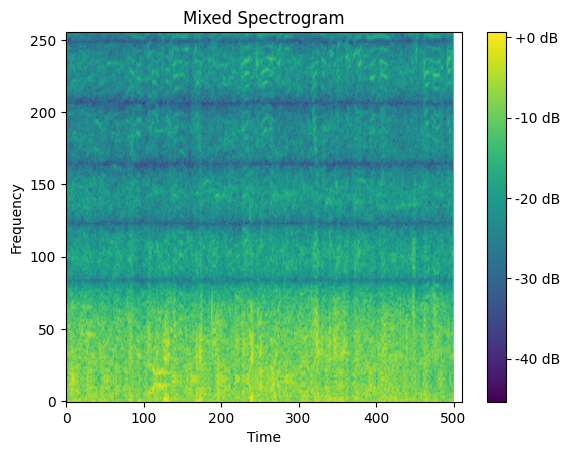

In [39]:
from torchvision import transforms
# Load and preprocess if not cached
clean_waveform, _ = torchaudio.load(file)

clean_spec = torchaudio.transforms.Spectrogram(n_fft=1022, win_length=1022, hop_length=256)(clean_waveform)

# Random cropping
clean_spec = transforms.RandomCrop(size=(256, 512),pad_if_needed=True)(clean_spec) 

mixed_spec = clean_spec.log2()[ 0, :, :].numpy()
# Display the spectrogram
plt.imshow(mixed_spec, cmap='viridis', origin='lower', aspect='auto')  
plt.title("Mixed Spectrogram")
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()


In [41]:
import torchaudio
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

# Iterate over the dataloader
for mixed_spec, clean_spec in dataloader:
    # Check if mixed audio is mono or stereo
    if clean_spec.shape[1] == 1:
        print("Mixed audio is mono.")
    else:
        print("Mixed audio is stereo.")
    mixed_spec = torch.squeeze(mixed_spec)
    mixed_spec = mixed_spec.log2[ 0, :, :].numpy()
    # Display the spectrogram
    plt.imshow(mixed_spec, cmap='viridis', origin='lower', aspect='auto')  
    plt.title("Mixed Spectrogram")
    plt.xlabel("Time")
    plt.ylabel("Frequency")
    plt.colorbar(format='%+2.0f dB')
    plt.show()


Mixed audio is mono.


TypeError: 'builtin_function_or_method' object is not subscriptable

In [29]:
import torch
import torchaudio
from torchaudio.transforms import GriffinLim

spectrogram = torch.load("/home/asdf/GAN/preprocessed_data/clean_0.pt")  
n_fft = 1024  # Match the n_fft used during spectrogram creation
griffin_lim = GriffinLim(n_fft=n_fft, win_length=n_fft, hop_length=256)
reconstructed_waveform = griffin_lim(spectrogram)
sample_rate = 16000
# Play or save the reconstructed waveform
torchaudio.save("reconstructed_audio.wav", reconstructed_waveform, sample_rate)  # Provide the correct sample rate


RuntimeError: istft(CPUComplexFloatType[1, 256, 512], n_fft=1024, hop_length=256, win_length=1024, window=torch.FloatTensor{[1024]}, center=1, normalized=0, onesided=None, length=None, return_complex=0) : expected the frequency dimension (3rd to the last) of the input tensor to match n_fft / 2 + 1 when onesided=True, but got 256